# Flight Price Prediction

## 1..Data analysis

In [63]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_excel(r'C:\Users\Hi\Downloads\Data_Train.xlsx')

In [65]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### About columns

Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Route: This contains information on starting and ending location of the journey in the standard format used by airlines.

Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Additional_Info: Shown any additional information about a flight

Price: Price of the flight

In [66]:
df = df.drop(['Additional_Info'],axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [68]:
df.shape

(10683, 10)

In [69]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

<AxesSubplot:>

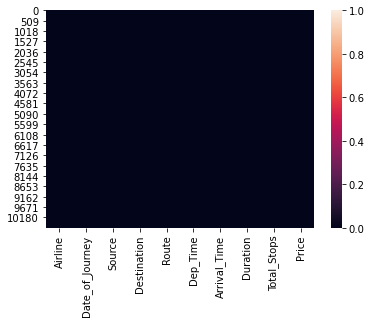

In [70]:
import seaborn as sns
sns.heatmap(df.isnull())

In [71]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## 2.EDA

In [72]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
________________________________________
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019    

In [73]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

<AxesSubplot:xlabel='Price'>

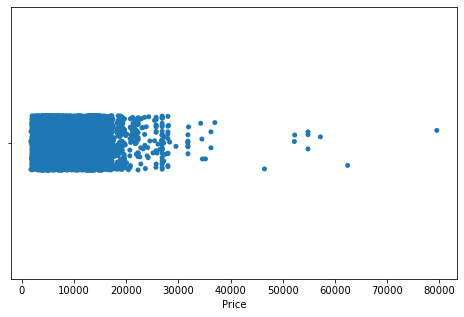

In [74]:
plt.figure(figsize=(8,5))
sns.stripplot(df['Price'])

In [75]:
df=df.dropna()

In [76]:
df.shape

(10682, 10)

Text(0.5, 1.0, 'Source')

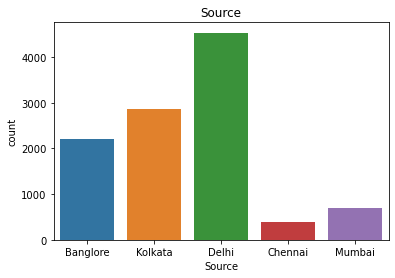

In [77]:
sns.countplot(df['Source'])
plt.title('Source')

Text(0.5, 1.0, 'Total_Stops')

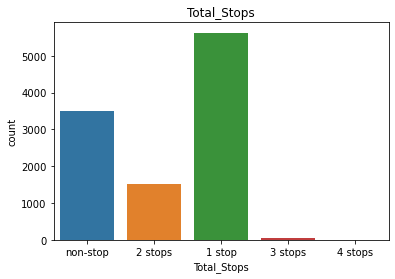

In [78]:
sns.countplot(df['Total_Stops'])
plt.title('Total_Stops')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

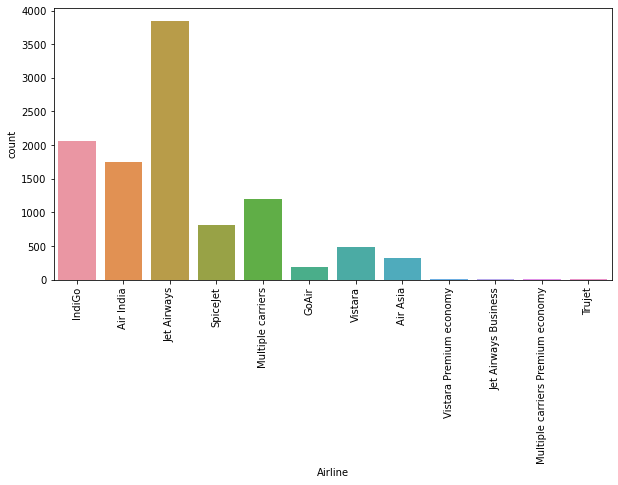

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(df['Airline'])
plt.xticks(rotation = 90)

<Figure size 720x360 with 0 Axes>

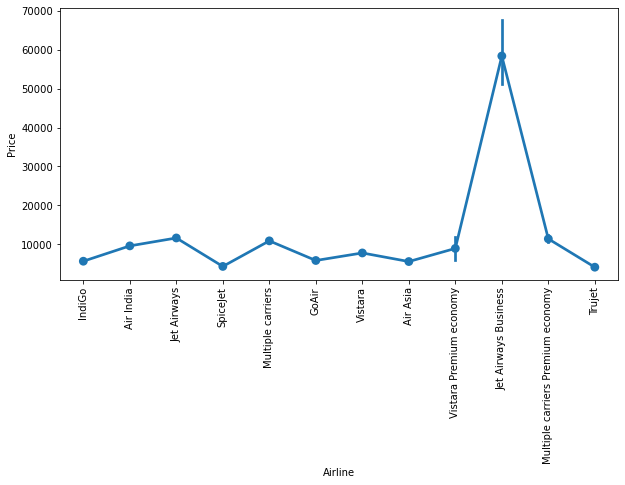

<Figure size 720x360 with 0 Axes>

In [80]:
plt.figure(figsize=(10,5))

sns.pointplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

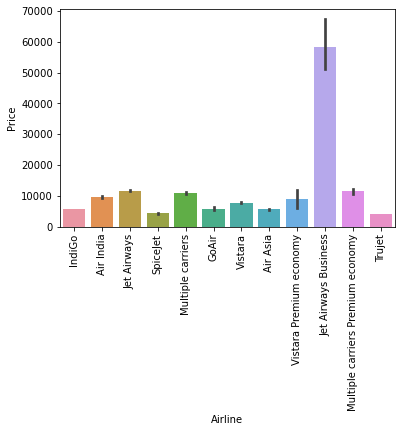

In [81]:
sns.barplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

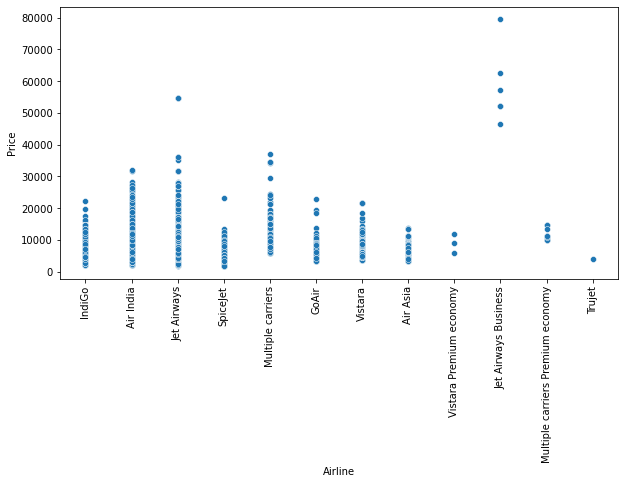

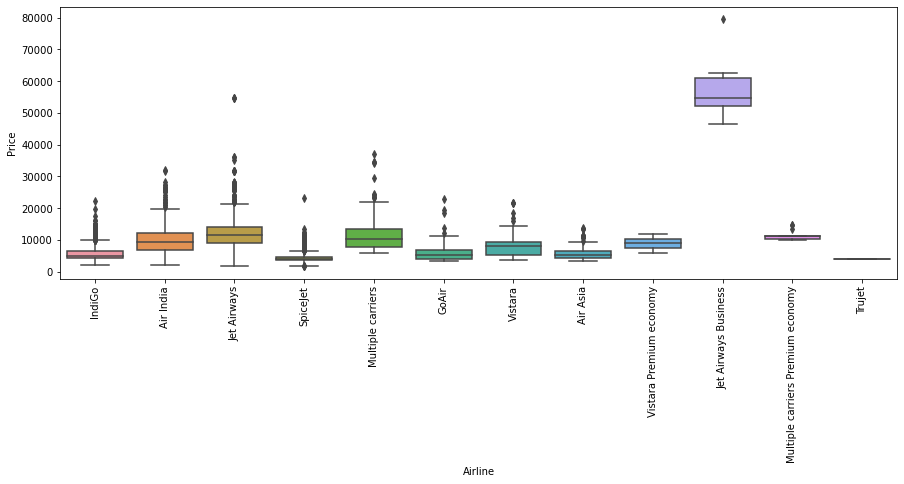

In [82]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
sns.boxplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

### correlation

In [152]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.013397,0.018446,0.025214,0.027886,0.035973,-0.039565
Source,-0.013397,1.000000,-0.592576,0.403412,-0.192009,-0.225605,0.015999
Destination,0.018446,-0.592576,1.000000,-0.461176,0.022029,0.337872,-0.071122
Route,0.025214,0.403412,-0.461176,1.000000,-0.062078,-0.437749,0.164149
Duration,0.027886,-0.192009,0.022029,-0.062078,1.000000,0.175191,-0.144280
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,0.175191,1.000000,-0.571221
Price,-0.039565,0.015999,-0.071122,0.164149,-0.144280,-0.571221,1.000000


<AxesSubplot:>

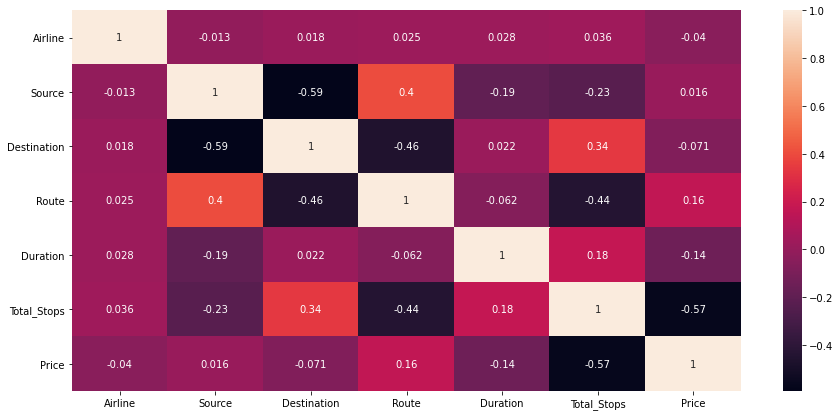

In [153]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

### Outcome of correlation

from heatmap source,Route dataset has positive correlation .

route has 16 percent correlation with target column which can be considered as a good bond.

source has 0.16 percent correlation with target column which can be considered as a good bond.

Total stops has -57% percent correlation with target column which can be considered as a negative bond.

max correlation :route 
    
min correlation: Total stops 

## 3.Data Preprocessing

In [85]:
feature = ['Arrival_Time','Dep_Time','Date_of_Journey']
df.drop(feature,axis=1,inplace=True)

In [86]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302


### Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [88]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
df["Airline"] = LabelEncoder().fit_transform(df['Airline'])
df["Source"] = LabelEncoder().fit_transform(df['Source'])
df['Destination'] = LabelEncoder().fit_transform(df['Destination'])
df["Route"] = LabelEncoder().fit_transform(df['Route'])
df['Total_Stops'] = LabelEncoder().fit_transform(df['Total_Stops'])
df['Duration'] = LabelEncoder().fit_transform(df['Duration'])

In [89]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,240,4,3897
1,1,3,0,84,336,1,7662
2,4,2,1,118,106,1,13882
3,3,3,0,91,311,0,6218
4,3,0,5,29,303,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,4107
10679,1,3,0,64,237,4,4145
10680,4,0,2,18,280,4,7229
10681,10,0,5,18,238,4,12648


#### Removing outliers

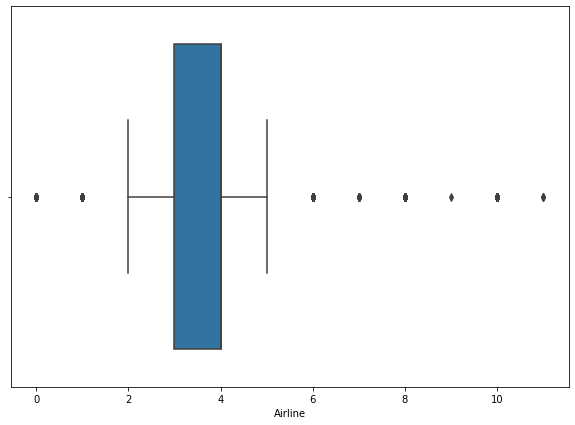

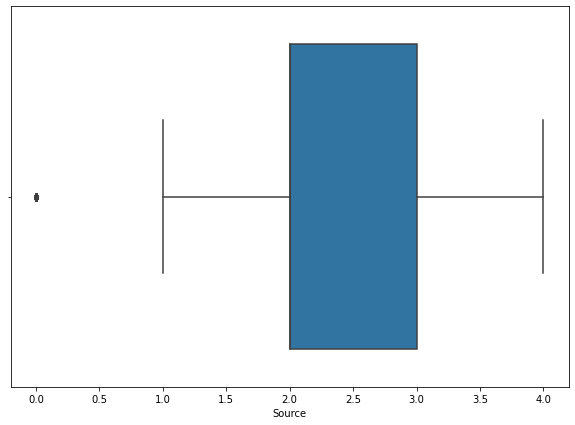

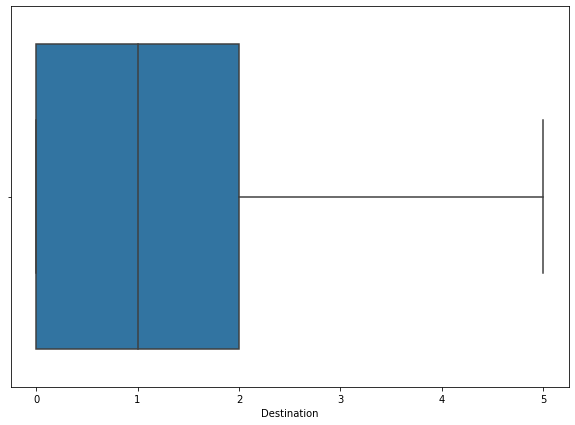

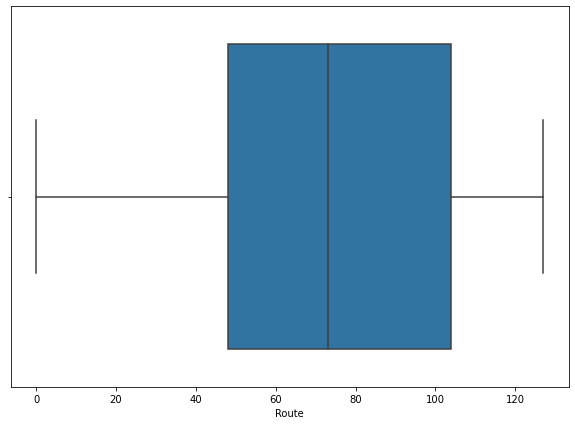

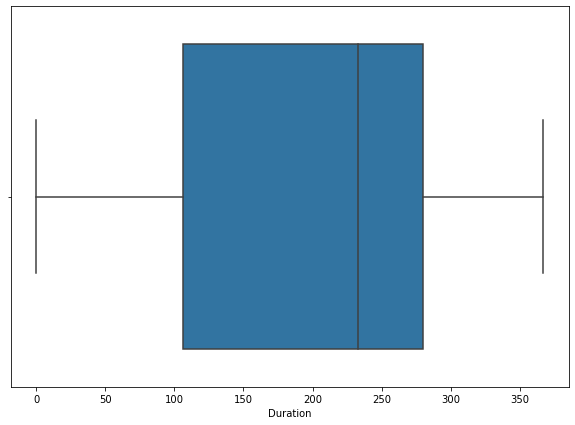

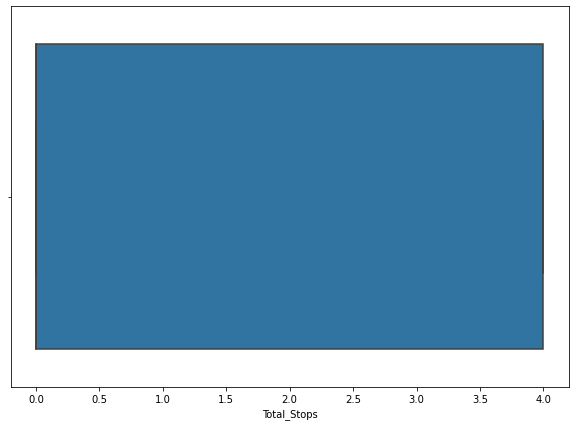

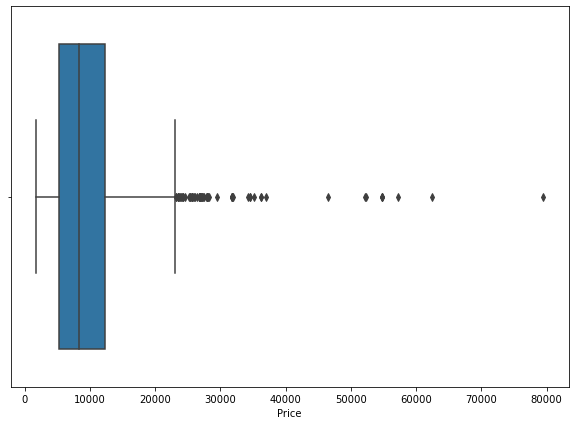

In [90]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.boxplot(df[i])

##### Z Score _ Technique

In [91]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(10682, 7)

In [92]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
         936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
        1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
        2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
        3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
        5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
        6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
        7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
        8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
        9192,  9238,  9631,  9714,  9973, 10051, 10112, 10159, 10181,
       10188, 10352, 10363, 10382, 10438, 10510], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 

In [93]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10682, 7)
(10586, 7)


percentage data loss

In [94]:
loss_percent=(10682-10586)/10682*100
print(loss_percent)

0.8987081070960493


percentage of data loss is low

#### Removing Skewness

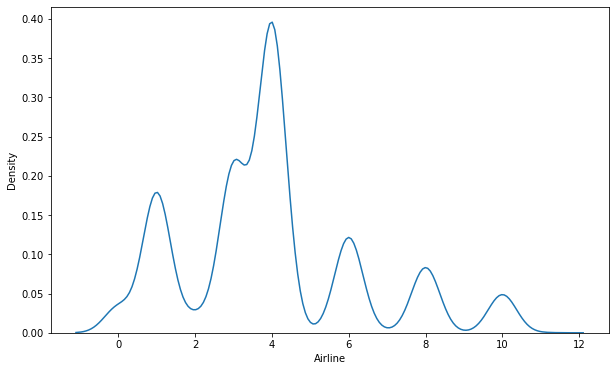

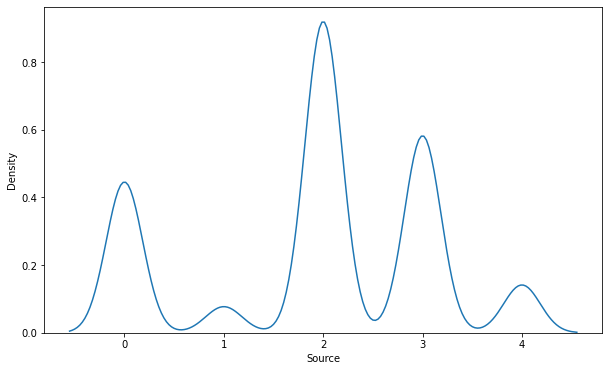

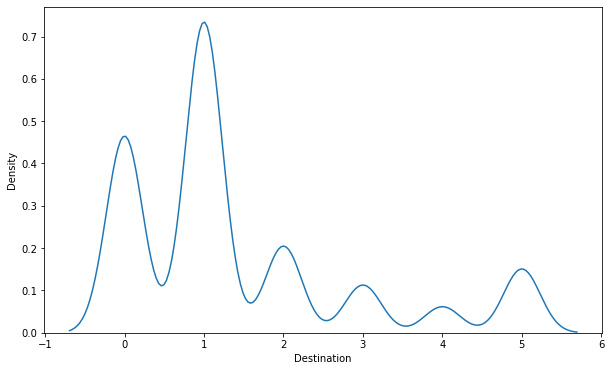

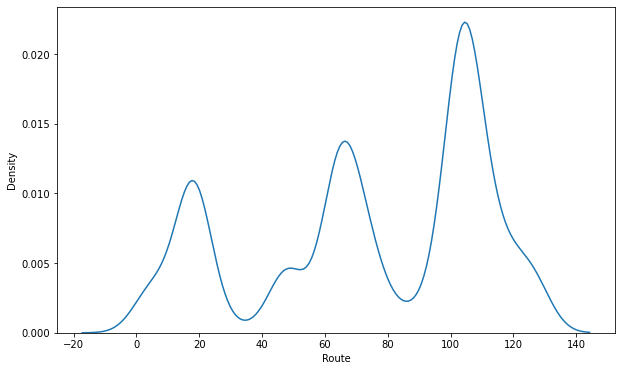

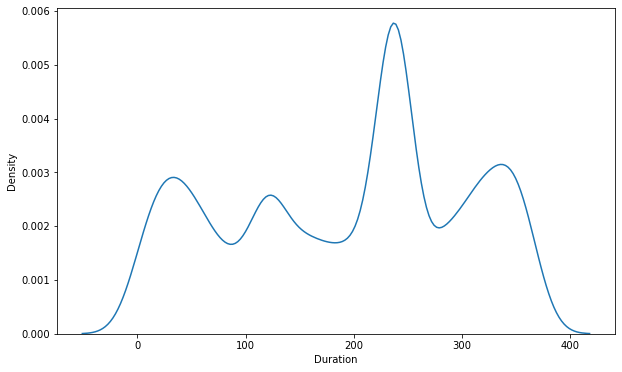

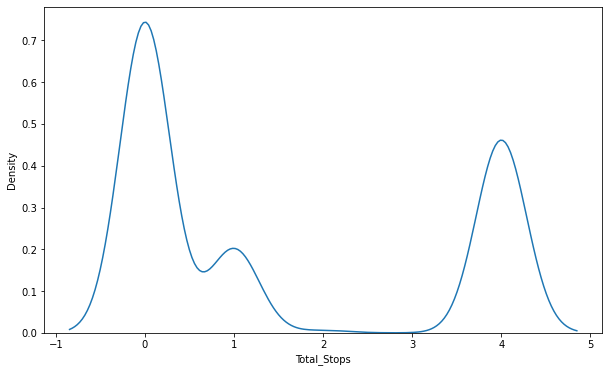

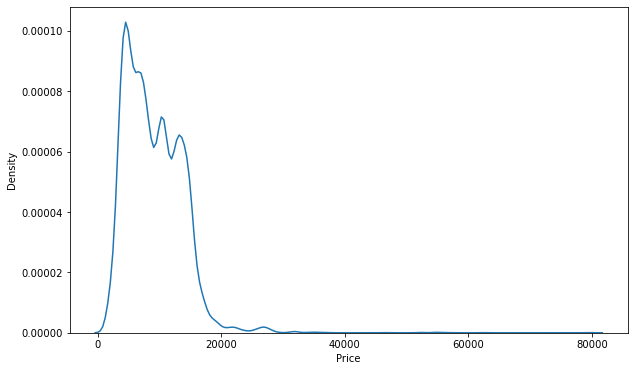

In [95]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

In [96]:
df.skew()

Airline        0.731057
Source        -0.424023
Destination    1.244046
Route         -0.501911
Duration      -0.213498
Total_Stops    0.631532
Price          1.812405
dtype: float64

inference: Destination and Price have high skewness

In [97]:
x= df.drop(columns='Price')
y= df['Price']

In [98]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

#### Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### 5.train test split

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


### finding best random_state

In [102]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test = lm.predict(x_test)
    a=r2_score(y_train,pred_train)
    b=r2_score(y_test,pred_test)
    c=a-b
    print(i,c)
    if d>=c:
        d=c
        print("least value",i,d)

0 0.014899613597117556
least value 0 0.014899613597117556
1 -0.00042206167800573624
least value 1 -0.00042206167800573624
2 0.003203355837161359
3 -0.03774325542517731
least value 3 -0.03774325542517731
4 0.028244718453950157
5 0.0017991547880154002
6 0.013083312771553612
7 -0.010675111123675585
8 -0.006153168746544813
9 -0.03813181264712584
least value 9 -0.03813181264712584
10 0.0030574096420226127
11 0.006878764280129457
12 -0.0031703987505050657
13 0.006562896529060391
14 0.010144184641070919
15 -0.01839938272248076
16 -0.0068090773374595015
17 0.014116480058054548
18 -0.012378707552180068
19 -0.013867945283095207
20 -0.015331839689584958
21 0.017058280108828705
22 -0.010318149523762754
23 -0.004717700833697269
24 0.020374573608823776
25 0.018751074990459027
26 0.03404051291150456
27 0.03660700017509344
28 -0.027776788002283337
29 -0.01383163836086343
30 0.026830048074022894
31 -0.04415028120297704
least value 31 -0.04415028120297704
32 -0.015692742133836313
33 0.009824199957895963

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=31)

# 6.Model Construction

### LinearRegression

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [105]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [106]:
predictions=lm.predict(x_test)

In [107]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  2835.894120048729
Mean Squared Error:  13517670.804993138
Root Mean Squared Error:  3676.638519761378
Explained Variance Score:  0.288330326920903


### RandomForestRegressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.7599789928862117


In [109]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1716.1639662357447
Mean Squared Error:  7852983.253275702
Root Mean Squared Error:  2802.3174790297585
Explained Variance Score:  0.5871347113387093
r2_score: 0.5865368284754724


### DecisionTreeRegressor

In [110]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.7647270655518289


In [111]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1764.089178553876
Mean Squared Error:  8587109.58955677
Root Mean Squared Error:  2930.3770388052067
Explained Variance Score:  0.5484589648300169
r2_score: 0.5478847400259217


### SVR

In [112]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.05340302488080195


In [113]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  3288.272715660477
Mean Squared Error:  17970356.801277187
Root Mean Squared Error:  4239.145763155259
Explained Variance Score:  0.09184850071663009
r2_score: 0.05385246894750062


In [114]:
svr_cv=cross_val_score(svr,x,y, cv = 4).mean()
svr_cv

0.05006848834062311

### GradientBoostingRegressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.6680948017686696


In [116]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  1819.8235191889125
Mean Squared Error:  7243162.956317311
Root Mean Squared Error:  2691.3124969645037
Explained Variance Score:  0.6187605241834229
r2_score: 0.6186441469184694


In [117]:
GBR_cv=cross_val_score(GBR,x,y, cv = 8).mean()
GBR_cv

0.6402150680054459

## Ridge

In [118]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.24413814455715588


In [119]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  2835.9196506861326
Mean Squared Error:  13517700.262115652
Root Mean Squared Error:  3676.6425257448745
Explained Variance Score:  0.2883287525416487
r2_score: 0.28828687877808534


In [120]:
R_cv=cross_val_score(R,x,y, cv = 7).mean()
R_cv

0.2510506537688761

After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 3 best models choosen for hyper parameter tuning are
1.RandomForestRegressor

2.DecisionTreeRegressor

3.GradientBoostingRegressor

### 1.RandomForestRegressor

In [121]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [122]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [123]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [124]:
RF_grid.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [125]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [126]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  1720.381789314089
Mean Squared Error:  7859647.327503514
Root Mean Squared Error:  2803.506256012908
Explained Variance Score:  0.5868069714063519
r2_score: 0.5861859619096541


In [127]:
#CV SCORE
rfr_cv=cross_val_score(rf,x,y, cv = 5).mean()
rfr_cv

0.629885736334068

### 2.DecisionTreeRegressor

In [128]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [129]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [130]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

In [131]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [132]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [133]:
print(DTR.score(x_train,y_train))

0.6678462084221897


In [134]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  1824.126999727336
Mean Squared Error:  7498553.24980266
Root Mean Squared Error:  2738.348635547099
Explained Variance Score:  0.6053249111392716
r2_score: 0.6051977307839405


### 3.GradientBoostingRegressor

In [135]:
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [141]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor(criterion='mse', loss='ls')

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [145]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  1819.823519188913
Mean Squared Error:  7243162.956317312
Root Mean Squared Error:  2691.3124969645037
Explained Variance Score:  0.6187605241834229
r2_score: 0.6186441469184694


In [146]:
#CV SCORE
GBR_cv=cross_val_score(GBR,x,y, cv = 5).mean()
GBR_cv

0.6380168282752214

##### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS GradientBoostingRegressor

In [148]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  1819.823519188913
Mean Squared Error:  7243162.956317312
Root Mean Squared Error:  2691.3124969645037
Explained Variance Score:  0.6187605241834229
r2_score: 0.6186441469184694


<AxesSubplot:xlabel='Price', ylabel='Density'>

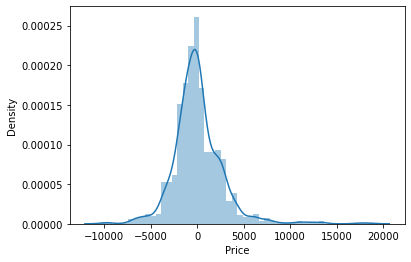

In [149]:
sns.distplot(y_test-GBR_final)

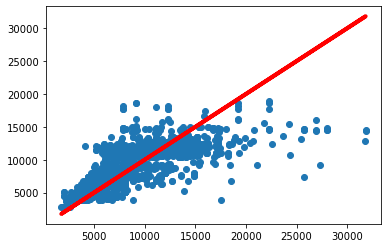

In [150]:
plt.scatter(y_test,GBR_final)
plt.plot(y_test,y_test,linewidth=4,color='Red')

## 7.SAVING THE MODEL

In [151]:
import joblib
joblib.dump(GBR,"final model.pkl")

['final model.pkl']